In [11]:
#  Imports & Parameters

import numpy as np
import matplotlib.pyplot as plt
from qutip import destroy, qeye, tensor, mesolve, expect
from qutip import basis, thermal_dm


# System parameters
omega_m = 1.0       # mechanical frequency
Delta = -omega_m    # detuning for cooling
g0 = 0.1            # single-photon coupling
g_eff = 0.2        # effective coupling
gamma = 0.01       # mechanical damping
kappa_res = 0.1     # resolved-sideband
kappa_dop = 3.0     # Doppler regime

N_cav = 6           # cavity levels
N_mec = 10          # mechanical levels
tlist = np.linspace(0,20,200)

In [12]:
#  Project 1 – Phonon Decay Simulation

C:\Users\soumy\.conda\envs\qc-env\lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


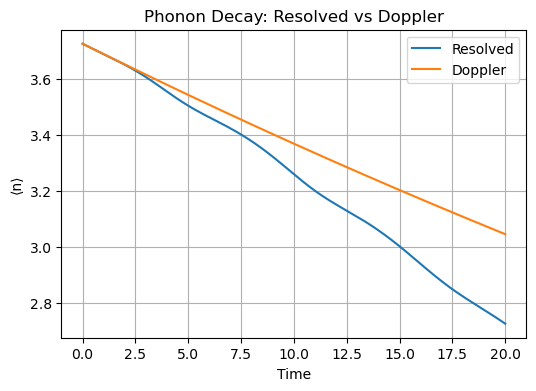

In [13]:
# Operators
a = destroy(N_cav)
b = destroy(N_mec)
I_c = qeye(N_cav)
I_m = qeye(N_mec)
a_tot = tensor(a, I_m)
b_tot = tensor(I_c, b)

# Hamiltonian
H = (-Delta)*a_tot.dag()*a_tot + omega_m*b_tot.dag()*b_tot + \
    g0 * a_tot.dag()*a_tot*(b_tot + b_tot.dag()) + \
    g_eff * (a_tot + a_tot.dag())
# Collapse operators
c_ops_res = [np.sqrt(kappa_res)*a_tot, np.sqrt(gamma)*b_tot]
c_ops_dop = [np.sqrt(kappa_dop)*a_tot, np.sqrt(gamma)*b_tot]

# Initial state
rho0 = tensor(basis(N_cav,0)*basis(N_cav,0).dag(), thermal_dm(N_mec,10))

# Solve
res = mesolve(H, rho0, tlist, c_ops_res, [b_tot.dag()*b_tot])
dop = mesolve(H, rho0, tlist, c_ops_dop,  [b_tot.dag()*b_tot])

n_res = np.real(res.expect[0])
n_dop = np.real(dop.expect[0])

plt.figure(figsize=(6,4))
plt.plot(tlist, n_res, label='Resolved')
plt.plot(tlist, n_dop, label='Doppler')
plt.xlabel('Time'); plt.ylabel('⟨n⟩')
plt.title('Phonon Decay: Resolved vs Doppler')
plt.legend(); plt.grid(True)
plt.savefig('phonon_decay.png', dpi=300)
plt.show()

In [14]:
# Project 2 – Cooling vs. Detuning & Wigner

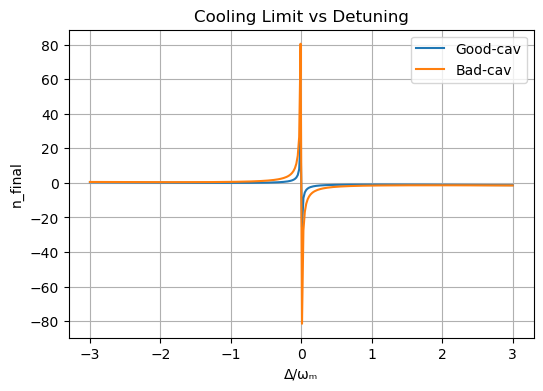

In [15]:
# Detuning sweep
Delta_vals = np.linspace(-3*omega_m,3*omega_m,300)
n_good, n_bad = [], []
for Dlt in Delta_vals:
    A_minus = kappa_res * g_eff**2 / ((Dlt+omega_m)**2 + (kappa_res/2)**2)
    A_plus  = kappa_res * g_eff**2 / ((Dlt-omega_m)**2 + (kappa_res/2)**2)
    n_good.append(A_plus/(A_minus-A_plus+1e-12))
    A_minus = kappa_dop * g_eff**2 / ((Dlt+omega_m)**2 + (kappa_dop/2)**2)
    A_plus  = kappa_dop * g_eff**2 / ((Dlt-omega_m)**2 + (kappa_dop/2)**2)
    n_bad.append(A_plus/(A_minus-A_plus+1e-12))

plt.figure(figsize=(6,4))
plt.plot(Delta_vals/omega_m, n_good, label='Good-cav')
plt.plot(Delta_vals/omega_m, n_bad,  label='Bad-cav')
plt.xlabel('Δ/ωₘ'); plt.ylabel('n_final')
plt.title('Cooling Limit vs Detuning')
plt.legend(); plt.grid(True)
plt.savefig('cooling_vs_detuning.png', dpi=300)
plt.show()

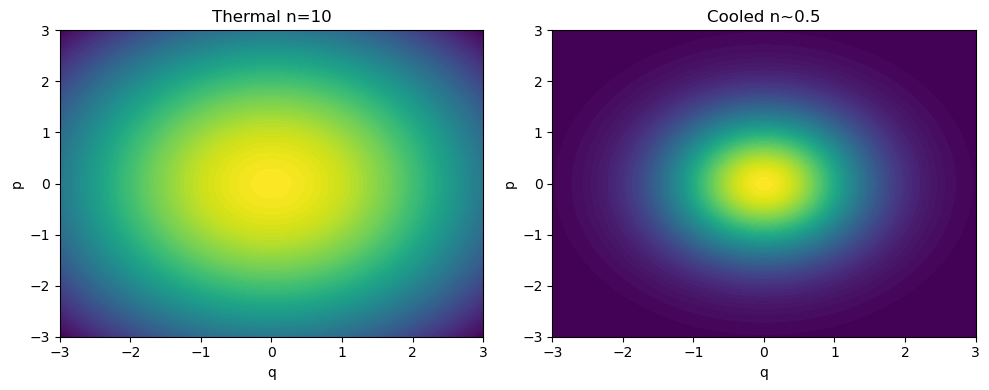

In [16]:
# Wigner distributions
grid = np.linspace(-3,3,200)
X,P = np.meshgrid(grid,grid)
n0_i, n0_f = 10, 0.5
W_i = (1/(np.pi*(2*n0_i+1))) * np.exp(-(X**2+P**2)/(2*n0_i+1))
W_f = (1/(np.pi*(2*n0_f+1))) * np.exp(-(X**2+P**2)/(2*n0_f+1))

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].contourf(X,P,W_i,100); ax[0].set_title('Thermal n=10')
ax[1].contourf(X,P,W_f,100); ax[1].set_title('Cooled n~0.5')
for a in ax: a.set_xlabel('q'); a.set_ylabel('p')
plt.tight_layout(); plt.savefig('wigner_thermal_vs_cooled.png',dpi=300)
plt.show()